## Clustering Subjects on the basis of their Difficulty Level (Using KMeans Clustering)

### Importing all necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Graphs & Visualization 
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Code to ignore all kind of warings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df=pd.read_excel('DATA-FINAL.xls')
df

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG
5,318192,1101776,KVY93,A+,97.0,33.0,75.0,96.0,80.0,Bachelor of Science (Honours) (Agriculture),...,0.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
6,318192,1101776,KVY94,A+,NaN,NaN,NaN,83.0,NaN,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
7,318192,1101776,KVY95,A,74.0,32.0,65.0,84.0,77.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
8,318192,1101776,KVY96,A+,82.0,38.0,58.0,NaN,75.0,Bachelor of Science (Honours) (Agriculture),...,15.0,46.0,181,65,Hostler,North,Female,Hindi,Theory,UG
9,318192,1101776,KVY97,B+,90.0,27.0,56.0,74.0,73.0,Bachelor of Science (Honours) (Agriculture),...,5.0,25.0,181,65,Hostler,North,Female,Hindi,Theory,UG


### Taking only Computer Science and Engineering branch data from whole dataset

In [4]:
df=df[df.MHRDName=='Bachelor of Technology (Computer Science and Engineering)']
df

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
38,218192,1112776,CFB28,A,68.0,36.0,75.0,NaN,85.0,Bachelor of Technology (Computer Science and E...,...,2.0,22.0,182,85,Day Scholar,West,Female,English,Theory,UG
39,218192,1112776,CFB51,A+,94.0,38.0,78.0,NaN,92.0,Bachelor of Technology (Computer Science and E...,...,5.0,8.0,182,85,Day Scholar,West,Female,English,Theory,UG
40,218192,1112776,CFB52,A,79.0,NaN,NaN,75.0,92.0,Bachelor of Technology (Computer Science and E...,...,1.0,17.0,182,85,Day Scholar,West,Female,English,Theory,UG
41,218192,1112776,CFB53,A,62.0,29.0,78.0,NaN,82.0,Bachelor of Technology (Computer Science and E...,...,4.0,1.0,182,85,Day Scholar,West,Female,English,Theory,UG
42,218192,1112776,CFB54,B+,74.0,27.0,63.0,NaN,87.0,Bachelor of Technology (Computer Science and E...,...,0.0,0.0,182,85,Day Scholar,West,Female,English,Theory,UG
43,218192,1112776,CFB55,B+,55.0,NaN,NaN,79.0,82.0,Bachelor of Technology (Computer Science and E...,...,1.0,0.0,182,85,Day Scholar,West,Female,English,Theory,UG
44,218192,1112776,CFB56,B+,65.0,25.0,59.0,NaN,88.0,Bachelor of Technology (Computer Science and E...,...,1.0,2.0,182,85,Day Scholar,West,Female,English,Theory,UG
45,218192,1112776,CFB57,A,72.0,35.0,76.0,NaN,89.0,Bachelor of Technology (Computer Science and E...,...,1.0,24.0,182,85,Day Scholar,West,Female,English,Theory,UG
46,218192,1112776,CFB58,O,97.0,44.0,68.0,NaN,90.0,Bachelor of Technology (Computer Science and E...,...,3.0,5.0,182,85,Day Scholar,West,Female,English,Theory,UG
369,218192,1194776,CFB28,A,58.0,29.0,76.0,NaN,94.0,Bachelor of Technology (Computer Science and E...,...,19.0,9.0,159,43,Hostler,South,Male,Hindi,Theory,UG


In [5]:
#seeing what types of values are present in the dataset
df.dtypes   

Termid           int64
Regd No          int64
Course          object
Grade           object
CA_100         float64
MTT_50         float64
ETT_100        float64
ETP_100        float64
Course_Att     float64
MHRDName        object
CA_1           float64
CA_2           float64
CA_3           float64
CA_4           float64
Height           int64
Weight           int64
ScholarType     object
Direction       object
Gender          object
Medium          object
CourseType      object
ProgramType     object
dtype: object

In [6]:
#looking count of all null values in a perticular coloumn
df.isnull().sum() 

Termid            0
Regd No           0
Course            0
Grade             0
CA_100          235
MTT_50         2228
ETT_100        2151
ETP_100        2749
Course_Att      528
MHRDName          0
CA_1            235
CA_2            235
CA_3            235
CA_4            235
Height            0
Weight            0
ScholarType       0
Direction         0
Gender            0
Medium            0
CourseType        0
ProgramType       0
dtype: int64

#### There are 2 columns as ETP and ETT now converting it to one column as there are only one value present for each entity of this two feature so converting it to endterm column

In [7]:
df['EndTerm']=''
new_list=[]
for index,row in df.iterrows():
    if(pd.isnull(row['ETT_100'])):
        new_list.append(row['ETP_100'])
    elif(pd.isnull(row['ETT_100']) and pd.isnull(row['ETP_100'])):
        new_list.append(0)
    else:
        new_list.append(row['ETT_100'])

In [8]:
df['EndTerm']=new_list

####  Now end term coloumn has zero null value as we will be considering it as our one of the feature while making use of clustering algorithm

In [9]:
df.isnull().sum()

Termid            0
Regd No           0
Course            0
Grade             0
CA_100          235
MTT_50         2228
ETT_100        2151
ETP_100        2749
Course_Att      528
MHRDName          0
CA_1            235
CA_2            235
CA_3            235
CA_4            235
Height            0
Weight            0
ScholarType       0
Direction         0
Gender            0
Medium            0
CourseType        0
ProgramType       0
EndTerm           0
dtype: int64

#### As if a student is absent then it has to be given zero marks in that doing same here

In [10]:
df.MTT_50.fillna(0,inplace=True)

#### Now coming on CA column if there is null value then filling it with the mean

In [11]:
df['CA_100'].fillna((df['CA_100'].mean()), inplace=True) 

#### Plotting the count of theory and practical subject with Countplot

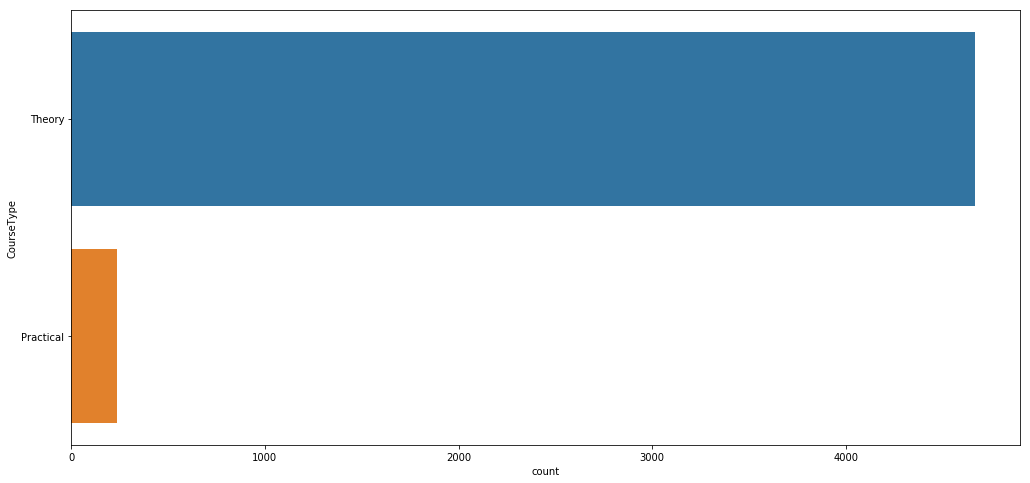

In [12]:

plt.figure(1 , figsize = (17,8))
sns.countplot(y = 'CourseType' , data = df)
plt.show()

#### Now let's vizualize the count of a perticular course using the count of all courses with Countplot

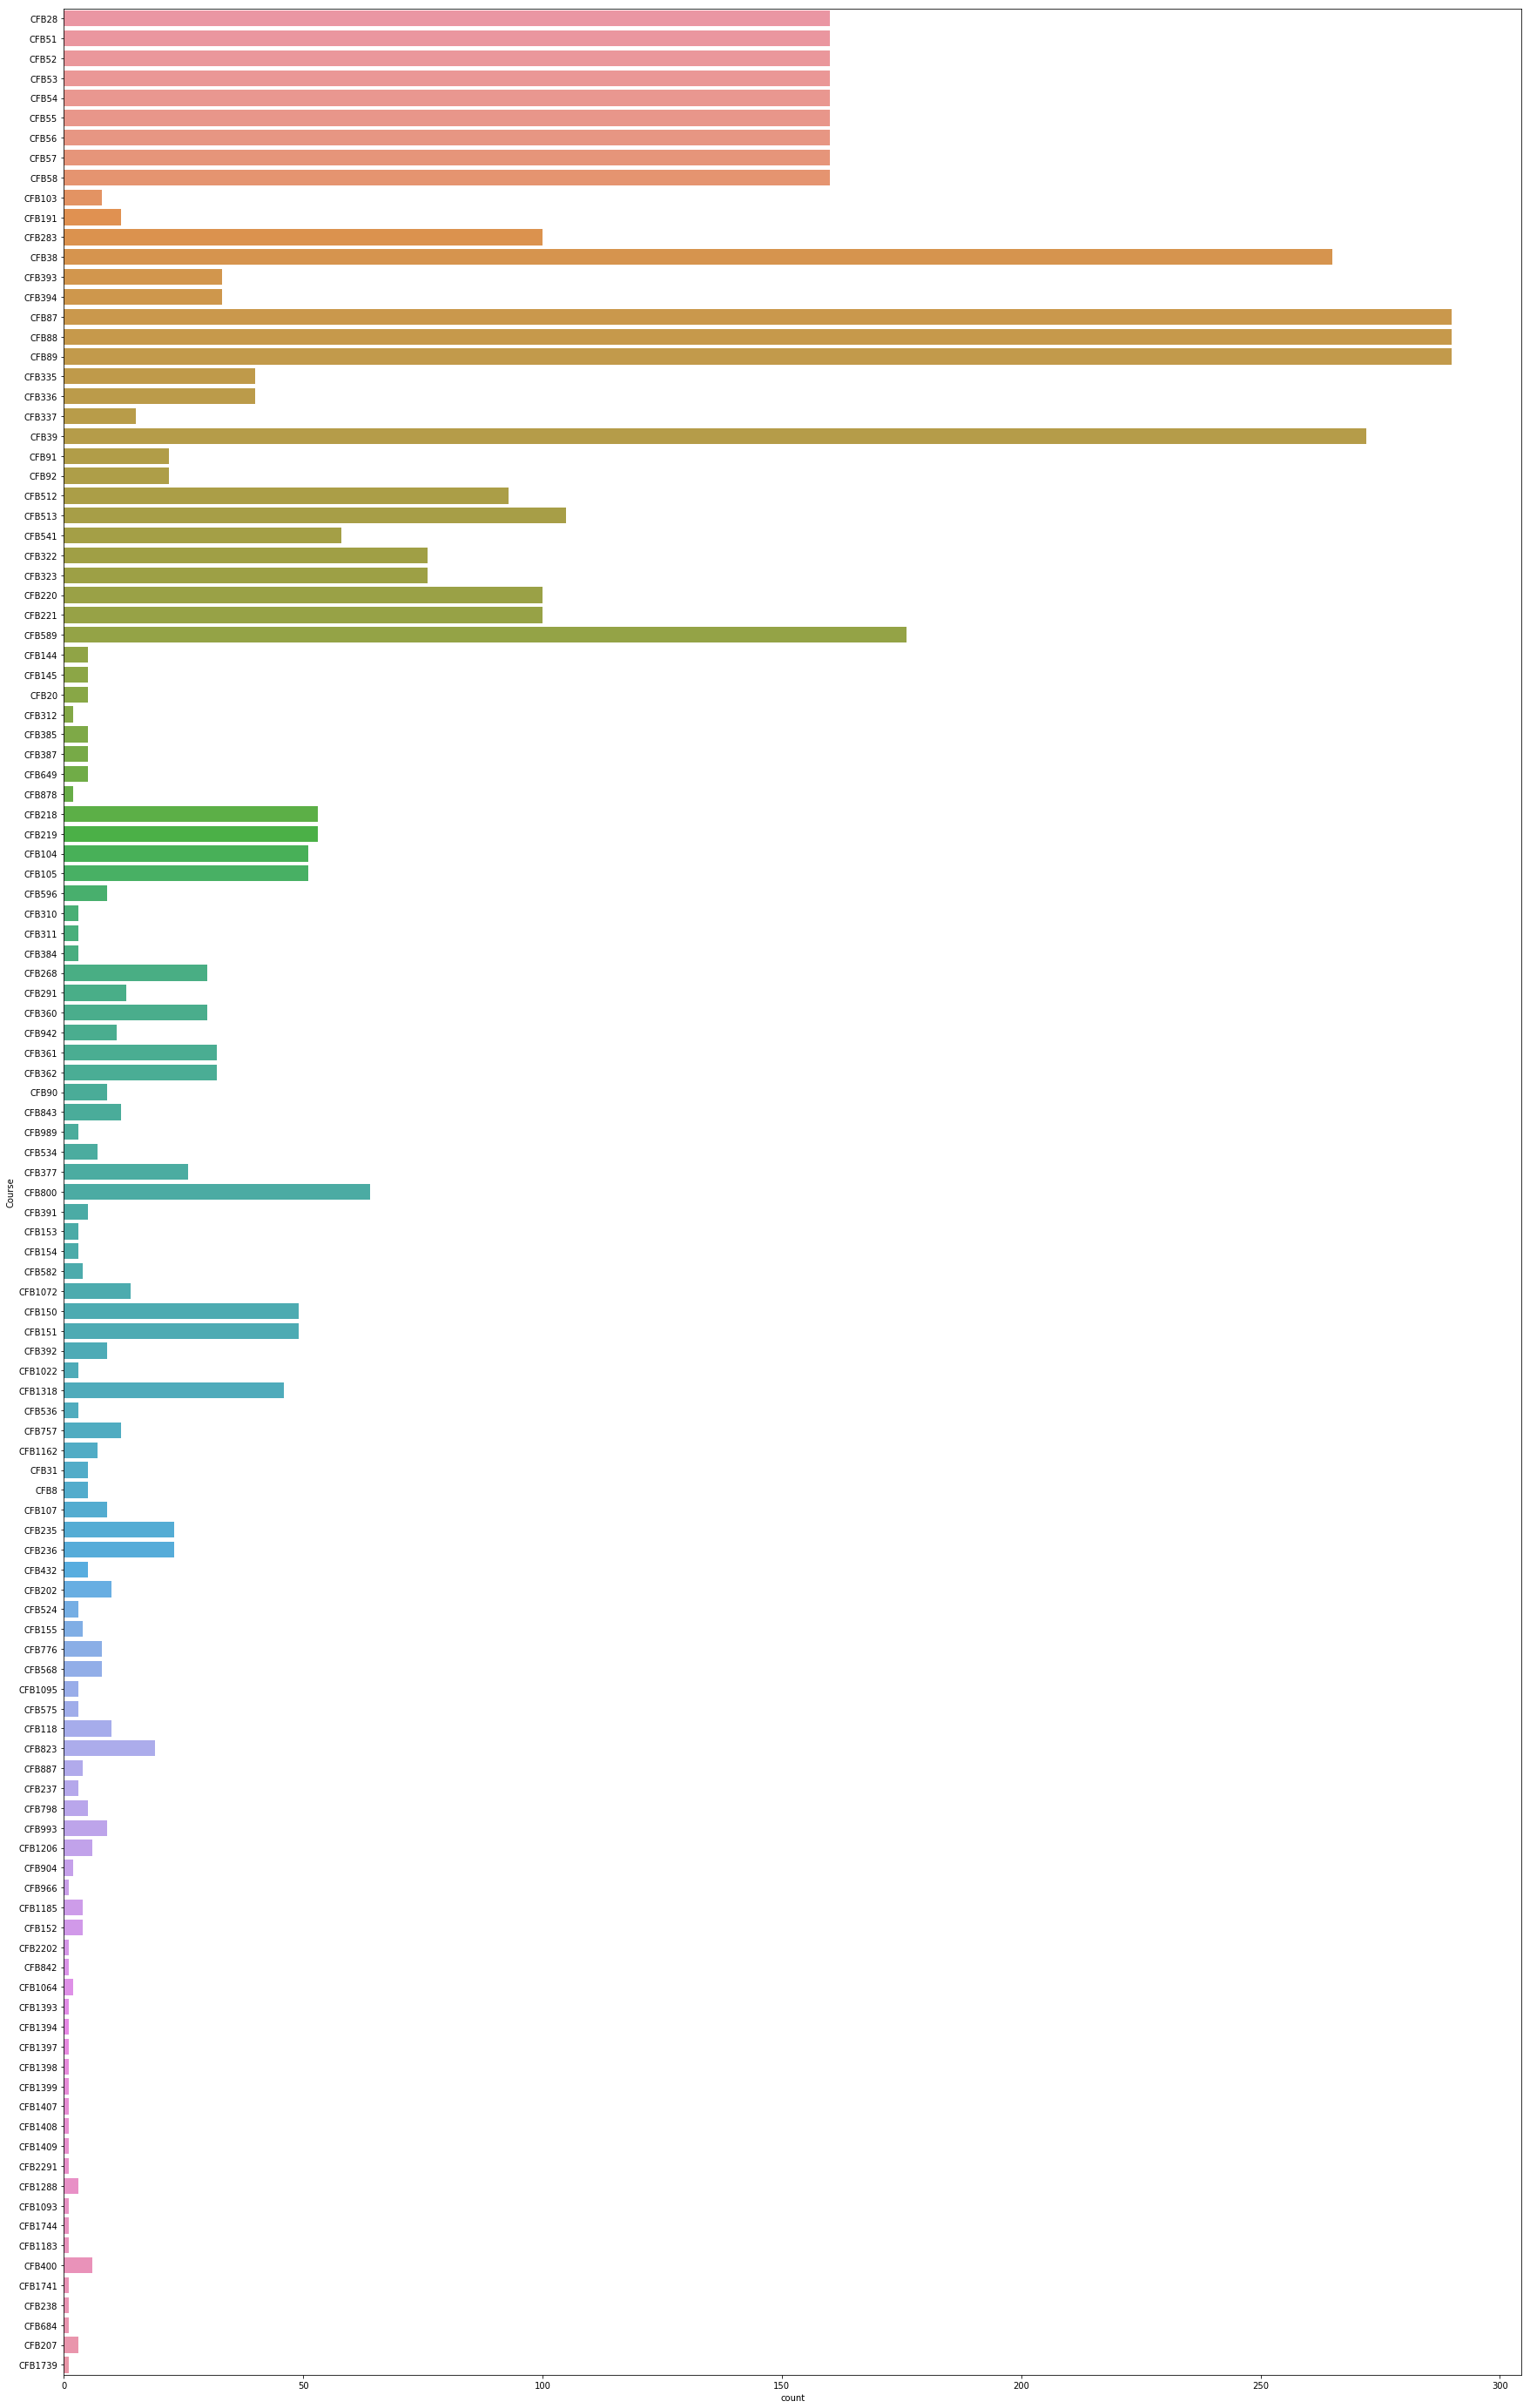

In [13]:
plt.figure(1 , figsize = (30 ,50 ))
sns.countplot(y = 'Course' , data = df)
plt.show()

#### Only selecting those rows whose having coursetype as theory

In [14]:

df=df[df['CourseType']=='Theory']

In [15]:
df

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType,EndTerm
38,218192,1112776,CFB28,A,68.0,36.0,75.0,NaN,85.0,Bachelor of Technology (Computer Science and E...,...,22.0,182,85,Day Scholar,West,Female,English,Theory,UG,75.0
39,218192,1112776,CFB51,A+,94.0,38.0,78.0,NaN,92.0,Bachelor of Technology (Computer Science and E...,...,8.0,182,85,Day Scholar,West,Female,English,Theory,UG,78.0
40,218192,1112776,CFB52,A,79.0,0.0,NaN,75.0,92.0,Bachelor of Technology (Computer Science and E...,...,17.0,182,85,Day Scholar,West,Female,English,Theory,UG,75.0
41,218192,1112776,CFB53,A,62.0,29.0,78.0,NaN,82.0,Bachelor of Technology (Computer Science and E...,...,1.0,182,85,Day Scholar,West,Female,English,Theory,UG,78.0
42,218192,1112776,CFB54,B+,74.0,27.0,63.0,NaN,87.0,Bachelor of Technology (Computer Science and E...,...,0.0,182,85,Day Scholar,West,Female,English,Theory,UG,63.0
43,218192,1112776,CFB55,B+,55.0,0.0,NaN,79.0,82.0,Bachelor of Technology (Computer Science and E...,...,0.0,182,85,Day Scholar,West,Female,English,Theory,UG,79.0
44,218192,1112776,CFB56,B+,65.0,25.0,59.0,NaN,88.0,Bachelor of Technology (Computer Science and E...,...,2.0,182,85,Day Scholar,West,Female,English,Theory,UG,59.0
45,218192,1112776,CFB57,A,72.0,35.0,76.0,NaN,89.0,Bachelor of Technology (Computer Science and E...,...,24.0,182,85,Day Scholar,West,Female,English,Theory,UG,76.0
46,218192,1112776,CFB58,O,97.0,44.0,68.0,NaN,90.0,Bachelor of Technology (Computer Science and E...,...,5.0,182,85,Day Scholar,West,Female,English,Theory,UG,68.0
369,218192,1194776,CFB28,A,58.0,29.0,76.0,NaN,94.0,Bachelor of Technology (Computer Science and E...,...,9.0,159,43,Hostler,South,Male,Hindi,Theory,UG,76.0


##### Mid term marks are out of 50 so converting them all to the scale of 100

In [16]:
mid_term100=[]
for index,row in df.iterrows():
    mid_term100.append((row['MTT_50']/50)*100)

##### Creating another coloum for MTT marks on 100 basis

In [17]:
df['MTT_100']=mid_term100   

##### Printing all kinds of grades that students have recieved

In [18]:
df['Grade'].unique()    #

array(['A', 'A+', 'B+', 'O', 'B', 'E', 'C', 'D', 'F', 'R', 'M', 'I'],
      dtype=object)

##### Conveting grades to value as to make it use while plotting graph 

In [19]:
df['GradePoints']=''
new_list_GradePoints=[]
for index,row in df.iterrows():
    if(row['Grade']=='O'):
        new_list_GradePoints.append(10)
    elif(row['Grade']=='A+'):
        new_list_GradePoints.append(9)
    elif(row['Grade']=='A'):
        new_list_GradePoints.append(8)
    elif(row['Grade']=='B+'):
        new_list_GradePoints.append(7)
    elif(row['Grade']=='B'):
        new_list_GradePoints.append(6)
    elif(row['Grade']=='C'):
        new_list_GradePoints.append(5)
    elif(row['Grade']=='D'):
        new_list_GradePoints.append(4)
    elif(row['Grade']=='E'):
        new_list_GradePoints.append(3)
    elif(row['Grade']=='F'):
        new_list_GradePoints.append(2)
    else:
        new_list_GradePoints.append(1)

In [20]:
df['GradePoints']=new_list_GradePoints

##### Plotting scatter plot of CA_100 and MTT_100 making use of common axis

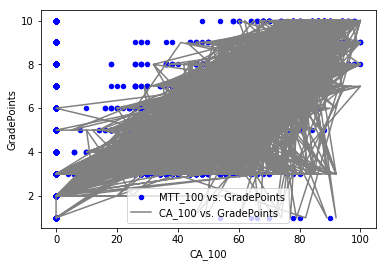

In [21]:
ax=df.plot(kind="scatter", x="MTT_100",y="GradePoints", color="b", label="MTT_100 vs. GradePoints")
df.plot(x="CA_100",y="GradePoints", color="grey", label="CA_100 vs. GradePoints", ax=ax)

##### Alternate method of above now not using a common axis #output : cant get anything insighful after plotting this graph so now plotting DistPlot

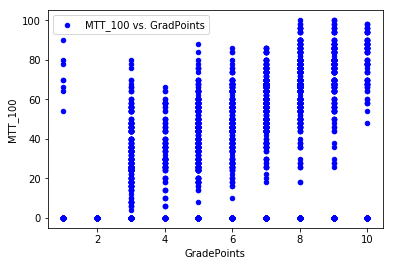

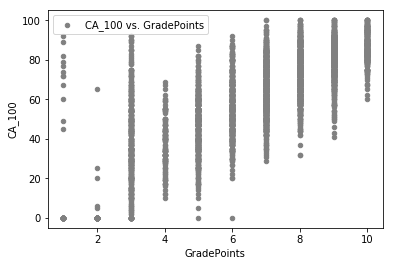

In [22]:
df.plot(kind="scatter", y="MTT_100",x="GradePoints", color="b", label="MTT_100 vs. GradPoints")
df.plot(kind="scatter",y="CA_100",x="GradePoints", color="grey", label="CA_100 vs. GradePoints")

##### Plotting the distplot to know the skewness of a particular column

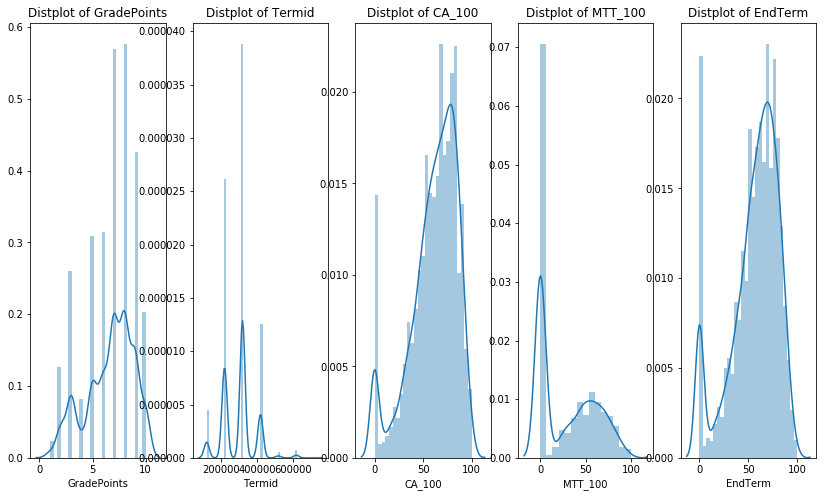

In [23]:

plt.figure(1 , figsize = (17 , 8))
n = 0 
for x in ['GradePoints','Termid','CA_100','MTT_100','EndTerm']:
    n += 1
    plt.subplot(1 , 6 , n)
    sns.distplot(df[x])
    plt.title('Distplot of {}'.format(x))
plt.show()

It is very much clear, that there is less skewness in the CA_100 Columns so i will be taking it along with EndTerm column in Clustering Algorithms

## Applying KMeans Clustering

Considering only 2 features (End Term Score and MTT Score ) and no Label available

In [24]:
x = df.iloc[:, [4,22]].values

Now we have to find numbers of cluster which we can plot so we can use Elbow method on Kmeans++ Calculations

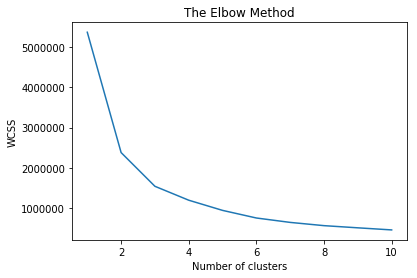

In [25]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=41)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [27]:
y_kmeans = kmeans.fit_predict(x)

In [28]:
print(y_kmeans)

[0 0 0 ... 0 0 0]


In [29]:
#converting list to dataframe
df_pred = pd.DataFrame(y_kmeans)

##### Plotting scatter plot to visualize in which particular subject belongs

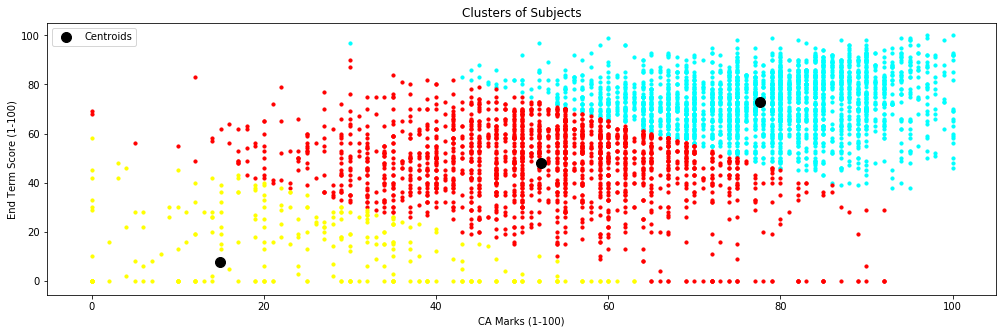

In [30]:

plt.figure(1 , figsize = (17 , 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'aqua',)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'red',)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'yellow',)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Subjects')
plt.xlabel('CA Marks (1-100)')
plt.ylabel('End Term Score (1-100)')
plt.legend()
plt.show()

#### Allocating proper labels

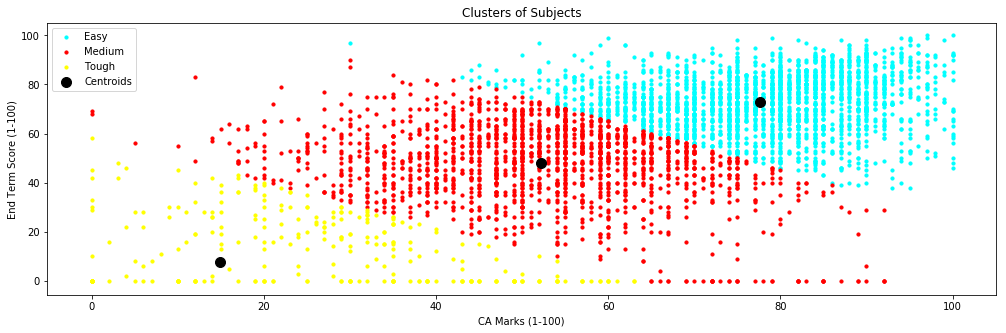

In [52]:
plt.figure(1 , figsize = (17 , 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'aqua', label ='Easy' )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'red', label ='Medium' )
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'yellow', label ='Tough' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Subjects')
plt.xlabel('CA Marks (1-100)')
plt.ylabel('End Term Score (1-100)')
plt.legend()
plt.show()

In [32]:
# getting cluster values 
kmeans.cluster_centers_

array([[77.66652841, 73.01617586],
       [52.24090909, 47.86988636],
       [14.90080972,  7.54048583]])

In [33]:
#making raw prediction
kmeans.predict([[20,30]])

array([2])

In [34]:
kmeans.predict([[90,10]])

array([1])

In [35]:
kmeans.predict([[80,80]])

array([0])

In [36]:
y_pred=kmeans.predict(x)

#### Finding silhouette_score

In [37]:
scores={}
from sklearn.metrics import silhouette_score
scores['KMean']=silhouette_score(x,y_kmeans)
print(silhouette_score(x,y_kmeans))

0.43506245206959915


## Applying Agglomerative Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(x)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x00000205498716A8>)

In [39]:
y_ac=clustering.labels_

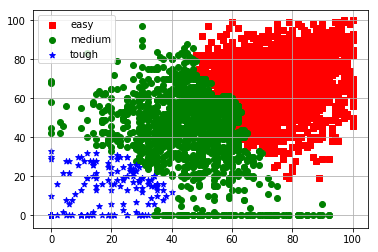

In [40]:
pp=np.array(x)
plt.scatter(x[y_ac==0,0],x[y_ac==0,1],c='red',marker='s',label='easy')
plt.scatter(x[y_ac==1,0],x[y_ac==1,1],c='green',marker='o',label='medium')
plt.scatter(x[y_ac==2,0],x[y_ac==2,1],c='blue',marker='*',label='tough')
plt.legend()
plt.grid()
plt.show()

#### Finding silhouette_score

In [41]:
from sklearn.metrics import silhouette_score
scores['Agglomerative']=silhouette_score(x,y_ac)
print(silhouette_score(x,y_ac))

0.4427438490696623


## CLUSTERING USING BIRCH

In [42]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=3)
model.fit(x)
y_bi = model.predict(x)

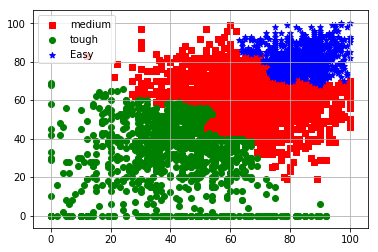

In [43]:
pp=np.array(x)
plt.scatter(pp[y_bi==0,0],pp[y_bi==0,1],c='red',marker='s',label='medium')
plt.scatter(pp[y_bi==1,0],pp[y_bi==1,1],c='green',marker='o',label='tough')
plt.scatter(pp[y_bi==2,0],pp[y_bi==2,1],c='blue',marker='*',label='Easy')
plt.legend()
plt.grid()
plt.show()

#### Finding silhouette_score

In [44]:
from sklearn.metrics import silhouette_score
scores['Birch']=silhouette_score(x,y_bi)
print(silhouette_score(x,y_bi))

0.3045949614754189


## Comparing all Clustering Algorithms

In [45]:
p1=[]
p2=[]
for o in scores.keys():
    p1.append(o)
    p2.append(scores[o])

Text(0.5,0,'Clustering Methods')

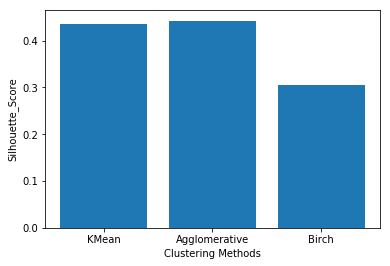

In [46]:
plt.bar(p1,p2)
plt.ylabel("Silhouette_Score")
plt.xlabel("Clustering Methods")

#### Predicting class of all Student whether that particular subject is easy,medium or tough using KMean as its Silhoutte_Score is same as that of Agglomerative and is high

In [57]:
output=[]
for index,rows in df.iterrows():
    if(np.asscalar(kmeans.predict([[rows['MTT_100'],rows['EndTerm']]]))==1):
        output.append('Medium')
    elif(np.asscalar(kmeans.predict([[rows['MTT_100'],rows['EndTerm']]]))==0):
        output.append('Simple')
    else:
        output.append('Hard')

In [58]:
df['Difficulty Level of Course']=output


In [59]:
df1 = df[['Course','Difficulty Level of Course']]
df1.head()

,Course,Difficulty Level of Course
38,CFB28,Simple
39,CFB51,Simple
40,CFB52,Medium
41,CFB53,Simple
42,CFB54,Medium
